In [63]:
#import
import numpy as np
from matplotlib import pyplot as plt

In [64]:
#Create Random Dataset 
m = 100
X = 6 * np.random.rand(m,1) - 3
Y = 0.5 * (X **2) + X + 2 + np.random.rand(m,1)


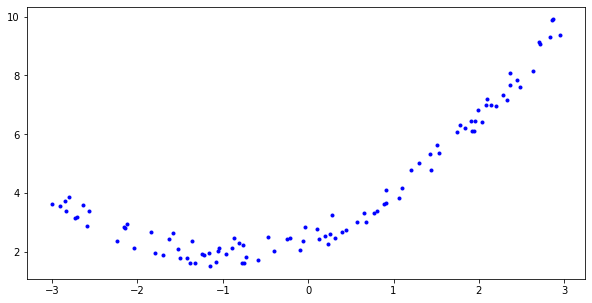

In [65]:
#visualize
plt.figure(figsize= (10,5))
plt.plot(X,Y,"b.")

In [66]:
#Create Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # to create new feature

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X_poly #has both X and polynomial X

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly,Y)
coef = lin_reg_model.coef_.reshape(2,1)
bias = lin_reg_model.intercept_
coef, bias

(array([[1.03001726],
        [0.50309891]]),
 array([2.46516904]))

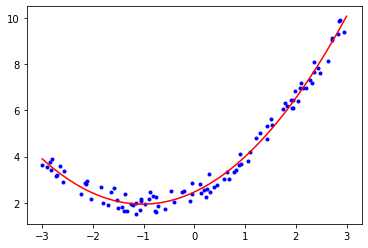

In [67]:
#Model we want to create is shown below
X_new = np.linspace(-3,3,100).reshape(100,1) #???
X_new_poly = poly_features.transform(X_new) #???
Y_new = lin_reg_model.predict(X_new_poly)
plt.plot(X,Y, "b.")
plt.plot(X_new,Y_new, "r-")

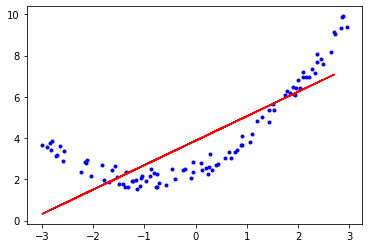

In [68]:
#Create Real Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size = 0.2, random_state = 10)
train_errors, validation_errors = [], []
m = len(X_train + 1)
model = LinearRegression()
model.fit(X_train,y_train)

#Show the model which is underfit
Y_test_predict = model.predict(X_val)
plt.plot(X,Y, "b.")
plt.plot(X_val,Y_test_predict, "r-")



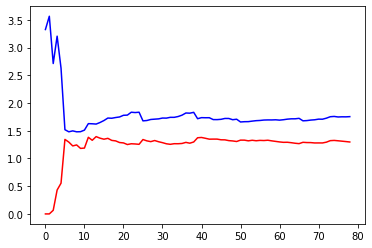

In [69]:
#Show underfitted Models train and test errors
for i in range(1,m):
    model.fit(X_train[:i], y_train[:i])
    y_train_predict = model.predict(X_train[:i])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:i], y_train_predict))
    validation_errors.append(mean_squared_error(y_val, y_val_predict))
plt.plot(np.sqrt(train_errors),"r-")
plt.plot(np.sqrt(validation_errors),"b-")

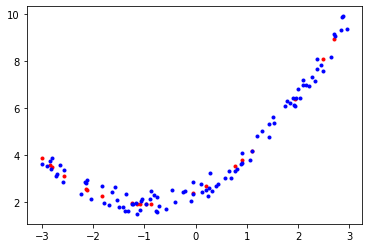

In [70]:
#Create Polynomial Model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # to create new feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
std_scaler = StandardScaler()
lin_reg = LinearRegression()

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
polynomial_regression = Pipeline([("poly_features",poly_features), ("std_scaler",std_scaler), ("model",lin_reg) ])
polynomial_regression.fit(X, Y)
y_poly_prediction = polynomial_regression.predict(X_val)
plt.plot(X_val, y_poly_prediction,"r.") # how to show as a x2 polynome 
plt.plot(X,Y,"b.")

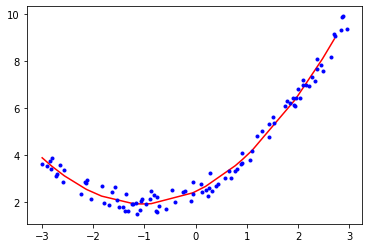

In [84]:
#Make prediction as x2 poly
X_val_old = X_val
X_val = np.sort(X_val, axis = None)
X_val = X_val.reshape(20,1)
y_poly_pred = polynomial_regression.predict(X_val)
plt.plot(X_val, y_poly_pred,"r-") # how to show as a x2 polynome 
plt.plot(X,Y,"b.")

WE DID IT! :)

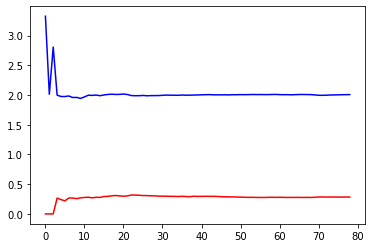

In [87]:
#Lets look at validation and train errors ??? NEDEN OVERFIT CIKTI????
train_errors, validation_errors = [], []
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
polynomial_regression = Pipeline([("poly_features",poly_features), ("std_scaler",std_scaler), ("model",lin_reg) ])

for i in range(1,m):
    polynomial_regression.fit(X_train[:i], y_train[:i])
    y_train_predict = polynomial_regression.predict(X_train[:i])
    y_val_predict = polynomial_regression.predict(X_val_old)
    train_errors.append(mean_squared_error(y_train[:i], y_train_predict))
    validation_errors.append(mean_squared_error(y_val, y_val_predict))
plt.plot(np.sqrt(train_errors),"r-")
plt.plot(np.sqrt(validation_errors),"b-")